## 03 - CNN Transfer Learning (JWE)

In [1]:
# import modules
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, models, transforms

In [2]:
# import custom moudles
from week_03.plots import show_images, visualize_model
from week_03.tf_functions import train_model

In [3]:
# settings
batch_size = 4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
# data transform
transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [5]:
# load train and test set
data_dir = 'week_03/data'

# prototype dicts
image_datasets = {}
dataloaders = {}
dataset_sizes = {}

# load data
for x, is_train in zip(['train', 'val'], [True, False]):
    image_datasets[x] = torchvision.datasets.CIFAR10(root='./week_03/data', train=is_train, download=True, transform=transform[x])
    dataloaders[x] = torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4)
    dataset_sizes[x] = len(image_datasets[x])

# get classnames
class_names = image_datasets['train'].classes

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


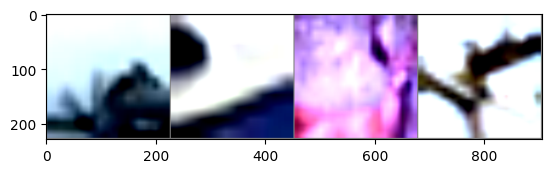

In [6]:
# get some random training images and visualize them
dataiter = iter(dataloaders['train'])
images, labels = next(dataiter)
show_images(images)

### Model Training
Train the pretrained resnet18 model without freezing - all layers

In [7]:
# load pretrained model
model_ft = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
# number of outputs of resnet18
num_ftrs = model_ft.fc.in_features
# add layer to network
model_ft.fc = nn.Linear(num_ftrs, len(class_names))
# optimize model for device
model_ft = model_ft.to(device)

In [8]:
# set criterion
criterion = nn.CrossEntropyLoss()

In [9]:
# set optimizer
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

In [10]:
# set epsion decay (learning rate)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [11]:
# train the (pretrained) model
model_ft = train_model(model_ft, dataloaders, dataset_sizes, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25, device=device)

Epoch 0/24
----------
train Loss: 1.4354 Acc: 0.5300

val Loss: 0.5148 Acc: 0.8342

Epoch 1/24
----------
train Loss: 1.0783 Acc: 0.6452

val Loss: 0.4148 Acc: 0.8606

Epoch 2/24
----------
train Loss: 0.9402 Acc: 0.6878

val Loss: 0.3631 Acc: 0.8817

Epoch 3/24
----------
train Loss: 0.8620 Acc: 0.7149

val Loss: 0.3373 Acc: 0.8910

Epoch 4/24
----------
train Loss: 0.7945 Acc: 0.7336

val Loss: 0.2965 Acc: 0.8996

Epoch 5/24
----------
train Loss: 0.7490 Acc: 0.7475

val Loss: 0.3288 Acc: 0.8946

Epoch 6/24
----------
train Loss: 0.7051 Acc: 0.7617

val Loss: 0.2990 Acc: 0.9007

Epoch 7/24
----------
train Loss: 0.5596 Acc: 0.8106

val Loss: 0.2057 Acc: 0.9316

Epoch 8/24
----------
train Loss: 0.5321 Acc: 0.8190

val Loss: 0.1906 Acc: 0.9353

Epoch 9/24
----------
train Loss: 0.5147 Acc: 0.8261

val Loss: 0.1867 Acc: 0.9352

Epoch 10/24
----------
train Loss: 0.5007 Acc: 0.8297

val Loss: 0.1813 Acc: 0.9395

Epoch 11/24
----------
train Loss: 0.4949 Acc: 0.8313

val Loss: 0.1784 Acc

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


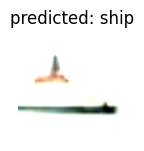

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


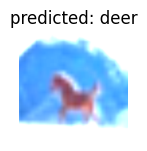

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


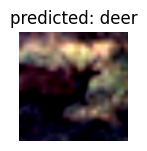

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


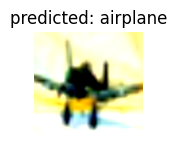

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


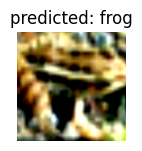

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


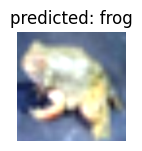

In [12]:
visualize_model(model_ft, dataloaders, class_names, device)

### Model Training
Train the pretrained resnet18 model with freezing everything except output layer

In [13]:
# load pretrained model
model_conv = torchvision.models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
# freeze all layers
for param in model_conv.parameters():
    param.requires_grad = False
# number of outputs of resnet18
num_ftrs = model_ft.fc.in_features
# add layer to network (is not fozen, by default)
model_conv.fc = nn.Linear(num_ftrs, len(class_names))
# optimize model for device
model_conv = model_conv.to(device)

In [15]:
model_conv = train_model(model_ft, dataloaders, dataset_sizes, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25, device=device)

Epoch 0/24
----------
train Loss: 0.4684 Acc: 0.8414

val Loss: 0.1665 Acc: 0.9433

Epoch 1/24
----------
train Loss: 0.4578 Acc: 0.8465

val Loss: 0.1668 Acc: 0.9449

Epoch 2/24
----------
train Loss: 0.4537 Acc: 0.8468

val Loss: 0.1748 Acc: 0.9393

Epoch 3/24
----------
train Loss: 0.4560 Acc: 0.8445

val Loss: 0.1670 Acc: 0.9438

Epoch 4/24
----------
train Loss: 0.4537 Acc: 0.8464

val Loss: 0.1744 Acc: 0.9417

Epoch 5/24
----------
train Loss: 0.4670 Acc: 0.8417

val Loss: 0.1728 Acc: 0.9419

Epoch 6/24
----------
train Loss: 0.4590 Acc: 0.8433

val Loss: 0.1680 Acc: 0.9435

Epoch 7/24
----------
train Loss: 0.4555 Acc: 0.8456

val Loss: 0.1702 Acc: 0.9420

Epoch 8/24
----------
train Loss: 0.4620 Acc: 0.8443

val Loss: 0.1720 Acc: 0.9424

Epoch 9/24
----------
train Loss: 0.4638 Acc: 0.8433

val Loss: 0.1830 Acc: 0.9391

Epoch 10/24
----------
train Loss: 0.4582 Acc: 0.8444

val Loss: 0.1685 Acc: 0.9439

Epoch 11/24
----------
train Loss: 0.4641 Acc: 0.8422

val Loss: 0.1695 Acc

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


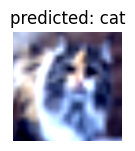

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


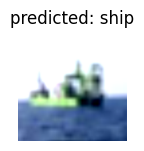

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


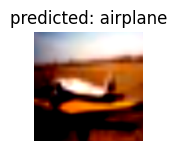

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


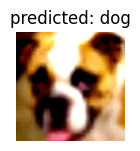

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


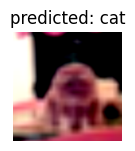

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


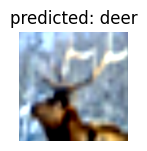

In [17]:
visualize_model(model_conv, dataloaders, class_names, device)

### Save and Load Models

In [18]:
torch.save(model_ft.state_dict(), 'week_03/resnet_18/model_ft.pt')
torch.save(model_conv.state_dict(), 'week_03/resnet_18/model_conv.pt')

In [40]:
# load resnet 18
model = torchvision.models.resnet18()
# add layer to network
model.fc = nn.Linear(model.fc.in_features, len(class_names))
# load model state dict
model.load_state_dict(torch.load('week_03/resnet_18/model_ft.pt'))

<All keys matched successfully>

In [43]:
model.eval()
batch = torch.randn(1, 3, 224, 224)
torch.onnx.export(model, batch, 'week_03/resnet_18/model.onnx', input_names=['Images'], output_names=['Classes'])

### Show Resnet18

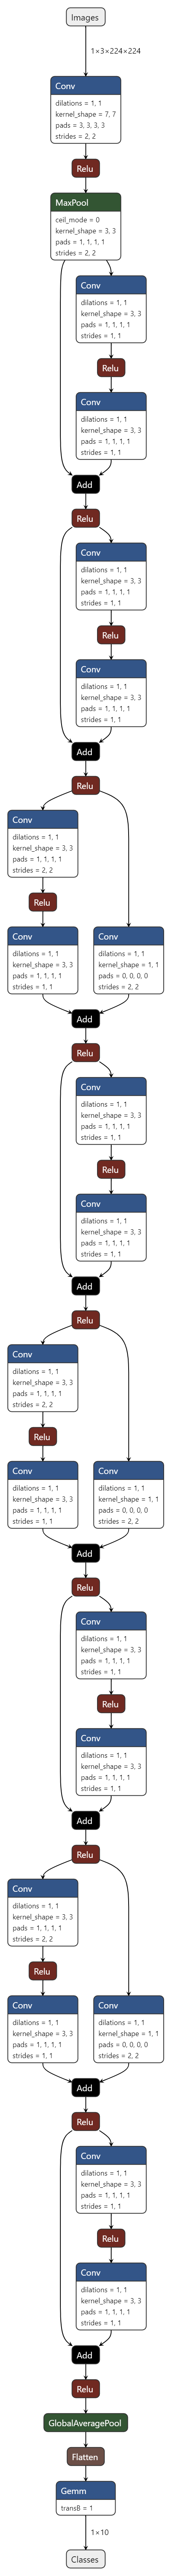